In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Exploring data from Asy_D03 (Numbers waiting longer than 6 months)

In [41]:
csv_file_path = 'processed-data\Data - Asy_D03_output.csv'

waiting_df = pd.read_csv(csv_file_path)

print(waiting_df.columns)

Index(['Date (as at…)', 'Nationality', 'Region', 'Applicant type',
       'Application stage', 'Duration', 'Applications'],
      dtype='object')


'Date (as at...)' is quarterly data
Duration is either less than 6 months or greater than 6 months
Applications is the number of applications in each category 

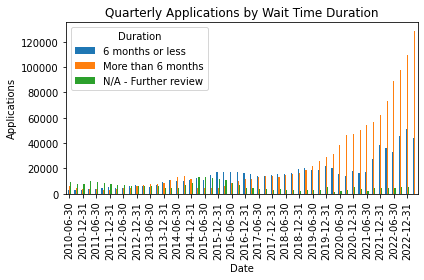

In [42]:
waiting_df['Date (as at…)'] = pd.to_datetime(waiting_df['Date (as at…)'], format='%d %b %Y')

grouped_df = waiting_df.groupby(['Date (as at…)', 'Duration'])['Applications'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Date (as at…)', columns='Duration', values='Applications')

pivot_df.plot(kind='bar')

plt.xlabel('Date')
plt.ylabel('Applications')
plt.title('Quarterly Applications by Wait Time Duration')

x_ticks_frequency = 20
x_tick_positions = range(0, len(pivot_df.index), len(pivot_df.index) // x_ticks_frequency)
x_tick_labels = pivot_df.index[x_tick_positions].strftime('%Y-%m-%d')
plt.xticks(ticks=x_tick_positions, labels=x_tick_labels)

plt.tight_layout() 
plt.legend(title='Duration')
plt.show()


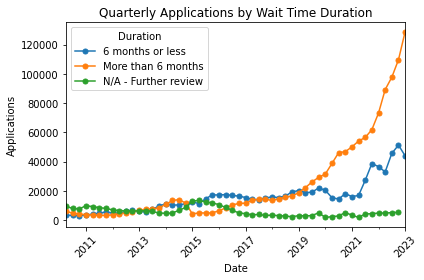

In [43]:
waiting_df['Date (as at…)'] = pd.to_datetime(waiting_df['Date (as at…)'], format='%d %b %Y')

# Group the data by 'Date (as at…)' and 'Duration' and calculate the sum of 'Applications' for each group
grouped_df = waiting_df.groupby(['Date (as at…)', 'Duration'])['Applications'].sum().reset_index()

# Pivot the DataFrame to get the 'Duration' values as columns
pivot_df = grouped_df.pivot(index='Date (as at…)', columns='Duration', values='Applications')

pivot_df.plot(kind='line', marker='o', markersize=5)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Applications')
plt.title('Quarterly Applications by Wait Time Duration')

plt.xticks(rotation=45)  # Rotates the x-axis labels for better visibility

plt.tight_layout() 
plt.legend(title='Duration')
plt.show()